## Diagnostic efficiency – specific evaluation of model performance

### EGU 2020 showcase by Robin Schwemmle

In [1]:
from pathlib import Path  # OS-independent path handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from de import de
from de import generate_errors
from de import kge
from de import nse
from de import util
from de import fdc

import warnings
warnings.filterwarnings('ignore')

## Proof of concept

### Observed streamflow time series from CAMELS dataset

The observed and simulated streamflow time series are part of the open-source CAMELS dataset (Addor et al., 2017). The data can be downloaded from https://ncar.github.io/hydrology/datasets/CAMELS_timeseries.

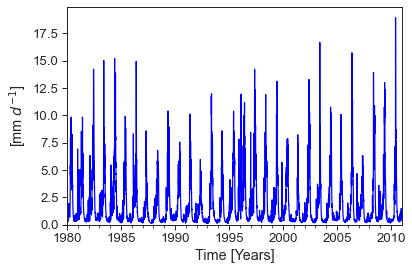

In [2]:
area = 619.11  # catchment area in km2 to convert runoff to mm/day
path = Path('./examples/13331500_streamflow_qc.txt')
df_ts = util.import_camels_ts(path, sep=r"\s+", catch_area=area) # import observed time series
fig_ts = util.plot_ts(df_ts)

Observed streamflow time series from CAMELS dataset (gauge_id: 13331500; gauge_name: Minam 160 River near Minam, OR, U.S.)

### Mimicking errors

Mimicking errors by systematic manipulation of an observed streamflow time series:
- constant error
- dynamic error
- timing error

#### Positive constant error

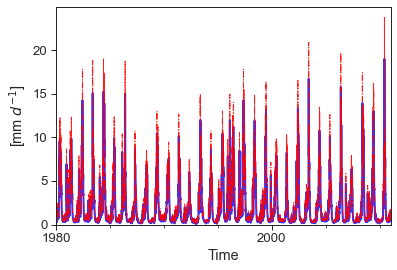

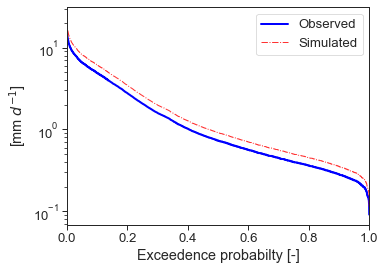

In [3]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate positive constant error
obs_sim.loc[:, 'Qsim'] = generate_errors.constant(df_ts['Qobs'].values,
                                                  offset=1.25)

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

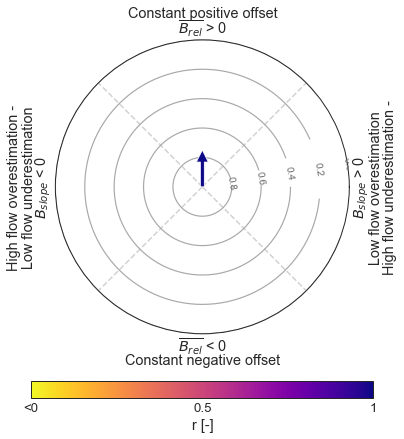

In [4]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

#### Positive dynamic error

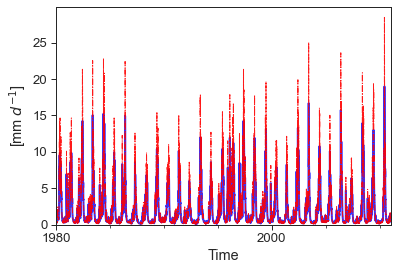

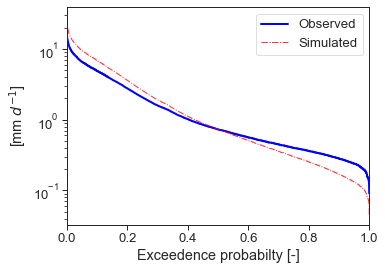

In [5]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate positive dynamic error
tsd = generate_errors.positive_dynamic(df_ts.copy(), prop=0.5)
obs_sim.loc[:, 'Qsim'] = tsd.loc[:, 'Qsim']

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

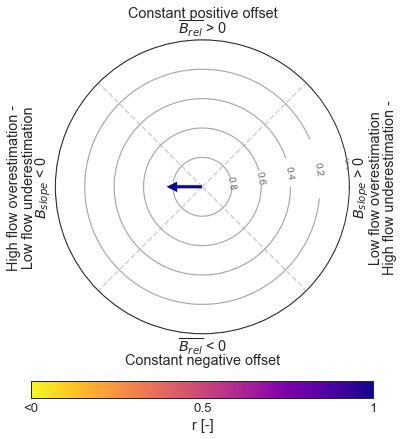

In [6]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

#### Timing error

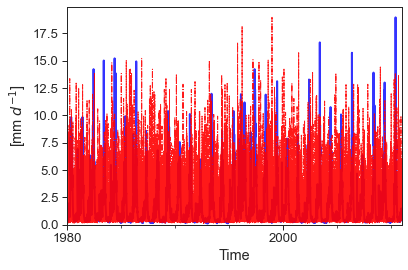

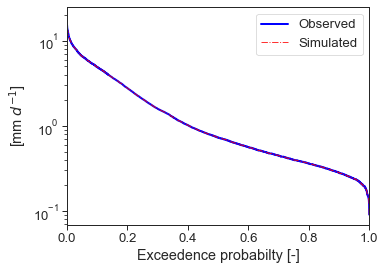

In [7]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate timing error
tss = generate_errors.timing(df_ts.copy(), shuffle=True)  # shuffling
obs_sim.loc[:, 'Qsim'] = tss.iloc[:, 0].values

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

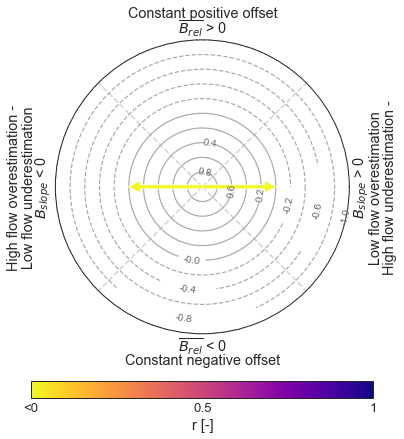

In [8]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

In this case, the two dynamic error types cannot be distinguished from each other. Thus, the arrow extends in both directions.

## Real case example

### Observed streamflow time series and simulated streamflow time series from CAMELS dataset

In order to demonstrate the applicability, we use simulated streamflow time series which have been derived from Addor et al. (2017). Streamflow time series have been simulated by the coupled Snow-17 and SAC-SMA system for the Minam catchment (gauge_id: 13331500; gauge_name: Minam 160 River near Minam, OR, U.S.). For more details about the modelling procedure we refer to section 3.1 in Newman et al. (2015). In the following, we show the results of the diagnostic evaluation for three model runs with different parameter sets. Simulations were generated with the same input data.

In [9]:
path_cam1 = Path('examples/13331500_05_model_output.txt')
path_cam2 = Path('examples/13331500_48_model_output.txt')
path_cam3 = Path('examples/13331500_94_model_output.txt')
df_cam1 = util.import_camels_obs_sim(path_cam1)
df_cam2 = util.import_camels_obs_sim(path_cam2)
df_cam3 = util.import_camels_obs_sim(path_cam3)

### Plotting simulated streamflow time series and corresponding flow duration curves

Text(0.95, 0.95, '(f; set_id: 94)')

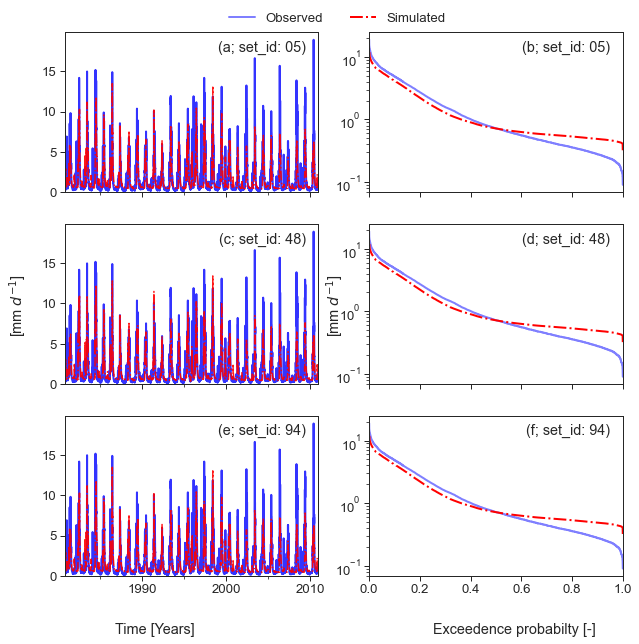

In [10]:
idx = ['05', '48', '94']
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex='col')
fig.text(0.06, 0.5, r'[mm $d^{-1}$]', ha='center', va='center',
         rotation='vertical')
fig.text(0.5, 0.5, r'[mm $d^{-1}$]', ha='center', va='center',
         rotation='vertical')
fig.text(0.25, 0.05, 'Time [Years]', ha='center', va='center')
fig.text(0.75, 0.05, 'Exceedence probabilty [-]', ha='center', va='center')

util.plot_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[0, 0], '')
axes[0, 0].text(.95, .95, '(a; set_id: {})'.format(idx[0]),
                transform=axes[0, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[0, 0].xaxis.set_major_locator(years_10)
axes[0, 0].xaxis.set_major_formatter(yearsFmt)
axes[0, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[0, 1], '')
axes[0, 1].text(.95, .95, '(b; set_id: {})'.format(idx[0]),
                transform=axes[0, 1].transAxes, ha='right', va='top')
# legend above plot
axes[0, 1].legend(loc=2, labels=['Observed', 'Simulated'], ncol=2,
                  frameon=False, bbox_to_anchor=(-0.6, 1.2))

util.plot_obs_sim_ax(df_cam2['Qobs'], df_cam2['Qsim'], axes[1, 0], '')
axes[1, 0].text(.95, .95, '(c; set_id: {})'.format(idx[1]),
                transform=axes[1, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[1, 0].xaxis.set_major_locator(years_10)
axes[1, 0].xaxis.set_major_formatter(yearsFmt)
axes[1, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[1, 1], '')
axes[1, 1].text(.95, .95, '(d; set_id: {})'.format(idx[1]),
                transform=axes[1, 1].transAxes, ha='right', va='top')

util.plot_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[2, 0], '')
axes[2, 0].text(.95, .95, '(e; set_id: {})'.format(idx[2]),
                transform=axes[2, 0].transAxes, ha='right', va='top')
# format the ticks
years_10 = mdates.YearLocator(10)
years_5 = mdates.YearLocator(5)
yearsFmt = mdates.DateFormatter('%Y')
axes[2, 0].xaxis.set_major_locator(years_10)
axes[2, 0].xaxis.set_major_formatter(yearsFmt)
axes[2, 0].xaxis.set_minor_locator(years_5)
util.fdc_obs_sim_ax(df_cam1['Qobs'], df_cam1['Qsim'], axes[2, 1], '')
axes[2, 1].text(.95, .95, '(f; set_id: {})'.format(idx[2]),
                transform=axes[2, 1].transAxes, ha='right', va='top')

### Evaluation of model performance

In [11]:
# create dataframe for comparison of DE, KGE and NSE
idx = ['05', '48', '94']
cols = ['brel_mean', 'b_area', 'temp_cor', 'de', 'b_dir', 'b_slope',
        'phi', 'beta', 'alpha', 'kge', 'nse']
df_eff_cam = pd.DataFrame(index=idx, columns=cols, dtype=np.float64)

#### Calculation of DE, KGE and NSE

In [12]:
# make arrays
obs_arr = df_cam1['Qobs'].values
sim_arr = df_cam1['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[0, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[0, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[0, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[0, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[0, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[0, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[0, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[0, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[0, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[0, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[0, 10] = nse.calc_nse(obs_arr, sim_arr)

# make arrays
obs_arr = df_cam2['Qobs'].values
sim_arr = df_cam2['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[1, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[1, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[1, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[1, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[1, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[1, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[1, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[1, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[1, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[1, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[1, 10] = nse.calc_nse(obs_arr, sim_arr)

# make arrays
obs_arr = df_cam3['Qobs'].values
sim_arr = df_cam3['Qsim'].values

# mean relative bias
brel_mean = de.calc_brel_mean(obs_arr, sim_arr)
df_eff_cam.iloc[2, 0] = brel_mean
# residual relative bias
brel_res = de.calc_brel_res(obs_arr, sim_arr)
# area of relative remaing bias
b_area = de.calc_bias_area(brel_res)
df_eff_cam.iloc[2, 1] = b_area
# temporal correlation
temp_cor = de.calc_temp_cor(obs_arr, sim_arr)
df_eff_cam.iloc[2, 2] = temp_cor
# diagnostic efficiency
df_eff_cam.iloc[2, 3] = de.calc_de(obs_arr, sim_arr)
# direction of bias
b_dir = de.calc_bias_dir(brel_res)
df_eff_cam.iloc[2, 4] = b_dir
# slope of bias
b_slope = de.calc_bias_slope(b_area, b_dir)
df_eff_cam.iloc[2, 5] = b_slope
# convert to radians
# (y, x) Trigonometric inverse tangent
df_eff_cam.iloc[2, 6] = np.arctan2(brel_mean, b_slope)

# KGE beta
df_eff_cam.iloc[2, 7] = kge.calc_kge_beta(obs_arr, sim_arr)
# KGE alpha
df_eff_cam.iloc[2, 8] = kge.calc_kge_alpha(obs_arr, sim_arr)
# KGE
df_eff_cam.iloc[2, 9] = kge.calc_kge(obs_arr, sim_arr)

# NSE
df_eff_cam.iloc[2, 10] = nse.calc_nse(obs_arr, sim_arr)

### Diagnostic polar plot

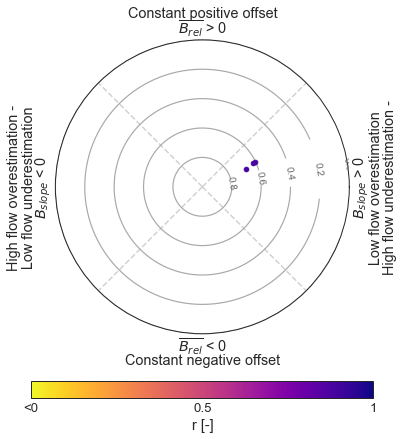

In [13]:
brel_mean_arr = df_eff_cam['brel_mean'].values
b_area_arr = df_eff_cam['b_area'].values
temp_cor_arr = df_eff_cam['temp_cor'].values
b_dir_arr = df_eff_cam['b_dir'].values
de_arr = df_eff_cam['de'].values
phi_arr = df_eff_cam['phi'].values
b_slope_arr = df_eff_cam['b_slope'].values

fig_de = de.diag_polar_plot_multi(brel_mean_arr, b_area_arr,
                                  temp_cor_arr, de_arr, b_dir_arr,
                                  phi_arr)

### Polar plot of KGE

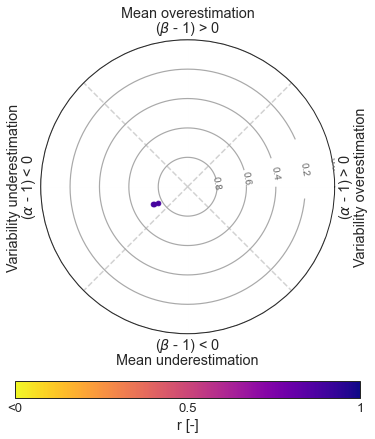

In [14]:
beta_arr = df_eff_cam['beta'].values
alpha_arr = df_eff_cam['alpha'].values
temp_cor_arr = df_eff_cam['temp_cor'].values
kge_arr = df_eff_cam['kge'].values
de_arr = df_eff_cam['de'].values
phi_arr = df_eff_cam['phi'].values
b_slope_arr = df_eff_cam['b_slope'].values

fig_kge = kge.polar_plot_multi(beta_arr, alpha_arr, temp_cor_arr, kge_arr)

### References

Addor, N., Newman, A. J., Mizukami, N., and Clark, M. P.: The CAMELS data set: catchment attributes and meteorology for large-sample studies, in, version 2.0 ed., Boulder, CO: UCAR/NCAR, 2017.

Newman, A. J., Clark, M. P., Sampson, K., Wood, A., Hay, L. E., Bock, A., Viger, R. J., Blodgett, D., Brekke, L., Arnold, J. R., Hopson, T., and Duan, Q.: Development of a large-sample watershed-scale hydrometeorological data set for the contiguous USA: data set characteristics and assessment of regional variability in hydrologic model performance, Hydrol. Earth Syst. Sci., 19, 209-223, 10.5194/hess-19-209-2015, 2015.